In [1]:
import pandas as pd #Read file
import numpy as np #Matrix multiplication
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report



from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/content/Heart_Attack_Data_Set.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.isnull().values.any() #IF there any null value reture True otherwise false

False

In [5]:
# normal attribute and class attribute feature alada korar jonno
x = df.iloc[:,:-1]

In [6]:
correlation=df.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

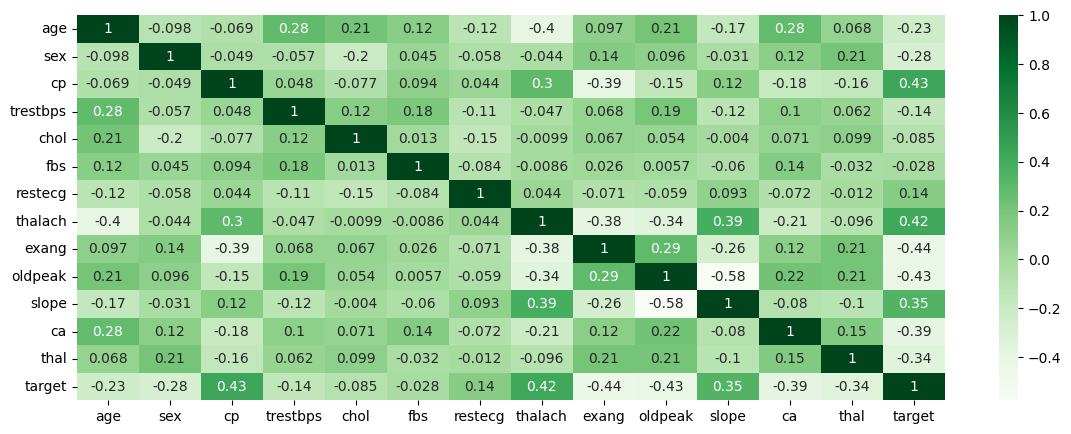

In [7]:
#heatmap
plt.figure(figsize=(14,5))
sns.heatmap(correlation, cmap="Greens", annot=True)

In [8]:
y = df.iloc[:,13]

In [9]:
# One will use for train and one will use for testing

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1 ,random_state= 2)  #10% for testing

In [10]:


sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [11]:
# Create a LassoCV model with cross-validation and fine-tune parameters
lasso = LassoCV(alphas=np.logspace(-5, 5, 200), cv=10, n_jobs=-1)
lasso.fit(x_train, y_train)

# Select features based on the Lasso regularization
# Use NumPy indexing for feature selection
selected_features = np.abs(lasso.coef_) > 1e-5  # Adjust the threshold as needed
x_train_selected = x_train[:, selected_features]
x_test_selected = x_test[:, selected_features]

RF

In [12]:
param_grid_rf = {
'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [5],  # Increased max_depth or set it to a specific value
    'min_samples_split': [2, 5, 10],  # Increased min_samples_split
    'min_samples_leaf': [1],  # Increased min_samples_leaf
    'max_features': ['auto', 'sqrt', 0.5],
    'random_state': [0]
}
rf = RandomForestClassifier()
rf_clf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy')
rf_clf.fit(x_train_selected,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5],
                         'max_features': ['auto', 'sqrt', 0.5],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [13]:
rf_pred = rf_clf.predict(x_test_selected) # Make predictions on the test data

In [14]:
print("Random Forest Accuracy:",accuracy_score(y_test,rf_pred))
print("Random Forest Precision:",precision_score(y_test,rf_pred))
print("Random Forest Recall:",recall_score(y_test,rf_pred))
print("Random Forest F1 Score:",f1_score(y_test,rf_pred))
print("Random Forest Confusion Matrix:",confusion_matrix(y_test,rf_pred))

Random Forest Accuracy: 0.9354838709677419
Random Forest Precision: 0.8888888888888888
Random Forest Recall: 1.0
Random Forest F1 Score: 0.9411764705882353
Random Forest Confusion Matrix: [[13  2]
 [ 0 16]]


DT

In [15]:
dc_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
dc_clf.fit(x_train_selected,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [16]:
dc_pred = dc_clf.predict(x_test_selected) # Make predictions on the test data

In [17]:
print("Decision Tree Accuracy:", accuracy_score(y_test,dc_pred))
print("Decision Tree Precision:",precision_score(y_test,dc_pred))
print("Decision Tree Recall:",recall_score(y_test,dc_pred))
print("Decision Tree F1 Score:",f1_score(y_test,dc_pred))
print("Decision Tree Confusion Matrix:", confusion_matrix(y_test,dc_pred))

Decision Tree Accuracy: 0.9032258064516129
Decision Tree Precision: 0.8421052631578947
Decision Tree Recall: 1.0
Decision Tree F1 Score: 0.9142857142857143
Decision Tree Confusion Matrix: [[12  3]
 [ 0 16]]


NB

In [18]:
nb_clf = GaussianNB()
nb_clf.fit(x_train_selected,y_train)

GaussianNB()

In [19]:
nb_pred = nb_clf.predict(x_test_selected)

In [20]:
print("Naive Bayes Accuracy:",accuracy_score(y_test,nb_pred))
print("Naive Bayes Precision:",precision_score(y_test,nb_pred))
print("Naive Bayes Recall:",recall_score(y_test,dc_pred))
print("Naive Bayes F1 Score:",f1_score(y_test,dc_pred))
print("Naive Bayes Confusion Matrix:",confusion_matrix(y_test,nb_pred))

Naive Bayes Accuracy: 0.967741935483871
Naive Bayes Precision: 1.0
Naive Bayes Recall: 1.0
Naive Bayes F1 Score: 0.9142857142857143
Naive Bayes Confusion Matrix: [[15  0]
 [ 1 15]]


LR

In [21]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter':[100,1000,10000]
}
logreg = LogisticRegression()
model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)

In [22]:
model.fit(x_train_selected,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [23]:
ans=model.predict(x_train_selected)

In [24]:
accuracy=accuracy_score(ans,y_train)
precision=precision_score(ans,y_train)
recall=recall_score(ans,y_train)
f1=f1_score(ans,y_train)

In [25]:
print("Training Accuracy is ",accuracy)
print("Training Precisiom is ",precision)
print("Training recall is ",recall)
print("Training F1 is ",f1)

Training Accuracy is  0.8419117647058824
Training Precisiom is  0.9060402684563759
Training recall is  0.823170731707317
Training F1 is  0.8626198083067093


In [26]:
anss=model.predict(x_test_selected)
accuracy_test_lr=accuracy_score(anss,y_test)
precision_test_lr=precision_score(anss,y_test)
recall_test_lr=recall_score(anss,y_test)
f1_test_lr=f1_score(anss,y_test)
print("Testing Accuracy is ",accuracy_test_lr)
print("Testing Precisiom is ",precision_test_lr)
print("Testing recall is ",recall_test_lr)
print("Testing F1 is ",f1)

Testing Accuracy is  0.9354838709677419
Testing Precisiom is  1.0
Testing recall is  0.8888888888888888
Testing F1 is  0.8626198083067093


XGBOOST

In [27]:
# Create and train the XGBoost model with normalized data
model2 = xgb.XGBClassifier(reg_alpha=2.0, max_depth=2, min_child_weight=5.0,min_samples_leaf= 2,random_state=0)
model2.fit(x_train_selected, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:07:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=5.0, min_samples_leaf=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [28]:
acc = model2.predict(x_train_selected)
accuracy_xgb=accuracy_score(acc,y_train)
precision_xgb=precision_score(acc,y_train)
recall_xgb=recall_score(acc,y_train)
f1_xgb=f1_score(acc,y_train)
print("Training Accuracy is ",accuracy_xgb)
print("Training Precisiom is ",precision_xgb)
print("Training recall is ",recall_xgb)
print("Training F1 is ",f1_xgb)

Training Accuracy is  0.8897058823529411
Training Precisiom is  0.9261744966442953
Training recall is  0.8789808917197452
Training F1 is  0.9019607843137255


In [29]:
acc2 = model2.predict(x_test_selected)
accuracy_xgb_test=accuracy_score(acc2,y_test)
precision_xgb_test=precision_score(acc2,y_test)
recall_xgb_test=recall_score(acc2,y_test)
f1_xgb_test=f1_score(acc2,y_test)
print("Testing Accuracy is ",accuracy_xgb_test)
print("Testing Precisiom is ",precision_xgb_test)
print("Testing recall is ",recall_xgb_test)
print("Testing F1 is ",f1_xgb_test)

Testing Accuracy is  0.9032258064516129
Testing Precisiom is  0.9375
Testing recall is  0.8823529411764706
Testing F1 is  0.9090909090909091


MLP clasiffier

In [30]:
model3 = MLPClassifier(hidden_layer_sizes=
                       (50,),random_state=1)
model3.fit(x_train_selected, y_train)
y_pred = model3.predict(x_train_selected)
acc_mlp  = accuracy_score(y_pred,y_train)
precision_mlp=precision_score(y_pred,y_train)
recall_mlp=recall_score(y_pred,y_train)
f1_mlp=f1_score(y_pred,y_train)
print("Traing Accuracy is ",acc_mlp)
print("Traing Precisiom is ",precision_mlp)
print("Traing recall is ",recall_mlp)
print("Traing F1 is ",f1_mlp)

Traing Accuracy is  0.8713235294117647
Traing Precisiom is  0.9261744966442953
Traing recall is  0.8518518518518519
Traing F1 is  0.8874598070739549


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
y_pred_t = model3.predict(x_test_selected)
acc_mlp_t  = accuracy_score(y_pred_t,y_test)
precision_mlp_t=precision_score(y_pred_t,y_test)
recall_mlp_t=recall_score(y_pred_t,y_test)
f1_mlp_t=f1_score(y_pred_t,y_test)
print("Testing Accuracy is ",acc_mlp_t)
print("Testing Precisiom is ",precision_mlp_t)
print("Testing recall is ",recall_mlp_t)
print("Testing F1 is ",f1_mlp_t)

Testing Accuracy is  0.8709677419354839
Testing Precisiom is  0.9375
Testing recall is  0.8333333333333334
Testing F1 is  0.8823529411764706


SVM

In [32]:
classifier = svm.SVC(kernel='linear', gamma='auto',C=2)
classifier.fit(x_train_selected,y_train)

Y_predict = classifier.predict(x_test_selected)

In [33]:
Y_predict = classifier.predict(x_test_selected)

In [34]:
print("SVM Accuracy:",accuracy_score(y_test,Y_predict))
print("SVM Precision:",precision_score(y_test,Y_predict))
print("SVM Forest Recall:",recall_score(y_test,Y_predict))
print("SVM Forest F1 Score:",f1_score(y_test,Y_predict))

SVM Accuracy: 0.9354838709677419
SVM Precision: 0.8888888888888888
SVM Forest Recall: 1.0
SVM Forest F1 Score: 0.9411764705882353


In [35]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_predict)
cm

array([[13,  2],
       [ 0, 16]])

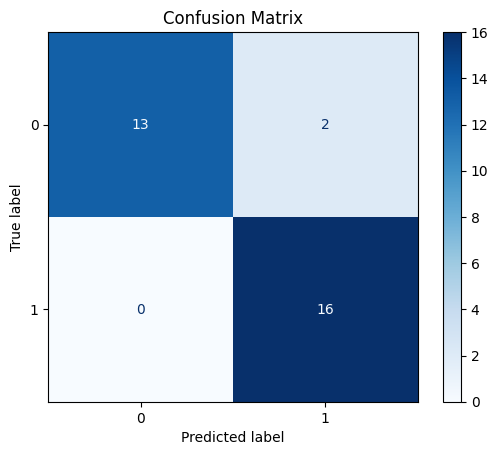

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

KNN

In [37]:
#When K = 5

#KNN MODEL building


knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier = knn_classifier.fit(x_train_selected,y_train)


#prediction

Y_pred = knn_classifier.predict(x_test_selected)

print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))

KNN Accuracy: 0.9354838709677419
KNN Precision: 0.8888888888888888
KNN Forest Recall: 1.0
KNN Forest F1 Score: 0.9411764705882353


In [38]:
#when k = 6

knn_classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train_selected,y_train)

#prediction
Y_pred = knn_classifier.predict(x_test_selected)

print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))

KNN Accuracy: 0.9032258064516129
KNN Precision: 0.8823529411764706
KNN Forest Recall: 0.9375
KNN Forest F1 Score: 0.9090909090909091


In [39]:
# When k= 7

knn_classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train_selected,y_train)
#prediction
Y_pred = knn_classifier.predict(x_test_selected)
print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


KNN Accuracy: 0.9032258064516129
KNN Precision: 0.8823529411764706
KNN Forest Recall: 0.9375
KNN Forest F1 Score: 0.9090909090909091


In [40]:
#When k= 8


knn_classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train_selected,y_train)

#prediction
Y_pred = knn_classifier.predict(x_test_selected)

#check accuracy

print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


KNN Accuracy: 0.9032258064516129
KNN Precision: 0.8823529411764706
KNN Forest Recall: 0.9375
KNN Forest F1 Score: 0.9090909090909091


In [41]:
#When k = 9


knn_classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train_selected,y_train)

#prediction
Y_pred = knn_classifier.predict(x_test_selected)

In [42]:
print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))

KNN Accuracy: 0.9032258064516129
KNN Precision: 0.8421052631578947
KNN Forest Recall: 1.0
KNN Forest F1 Score: 0.9142857142857143


In [43]:
cm = confusion_matrix(y_test,Y_pred)
cm

array([[12,  3],
       [ 0, 16]])

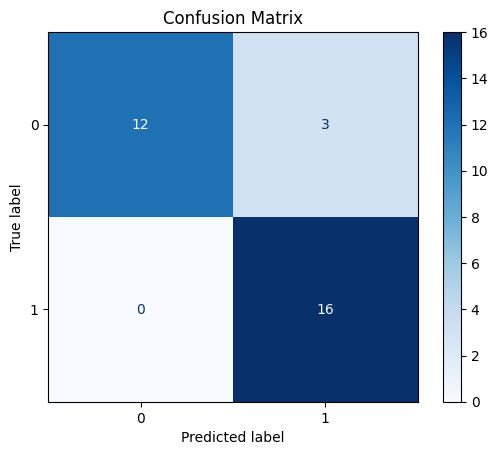

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_classifier.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

GB

In [45]:
# Create the Gradient Boosting classifier
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.001],
    'max_depth': [5],
    'min_samples_split': [30],
    'min_samples_leaf': [1],
    'random_state': [0]
}

# Instantiate the GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb_classifier = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Train the classifier on the training data
gb_classifier.fit(x_train_selected, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001], 'max_depth': [5],
                         'min_samples_leaf': [1], 'min_samples_split': [30],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [46]:
# Make predictions on the test data
Y_pred2 = gb_classifier.predict(x_test_selected)

In [47]:
print("GB Accuracy:",accuracy_score(y_test,Y_pred2))
print("GB Precision:",precision_score(y_test,Y_pred2))
print("GB Forest Recall:",recall_score(y_test,Y_pred2))
print("GB Forest F1 Score:",f1_score(y_test,Y_pred2))

GB Accuracy: 0.6451612903225806
GB Precision: 0.5925925925925926
GB Forest Recall: 1.0
GB Forest F1 Score: 0.7441860465116279


In [48]:
#confusion matrix

cm = confusion_matrix(y_test,Y_pred2)
cm

array([[ 4, 11],
       [ 0, 16]])

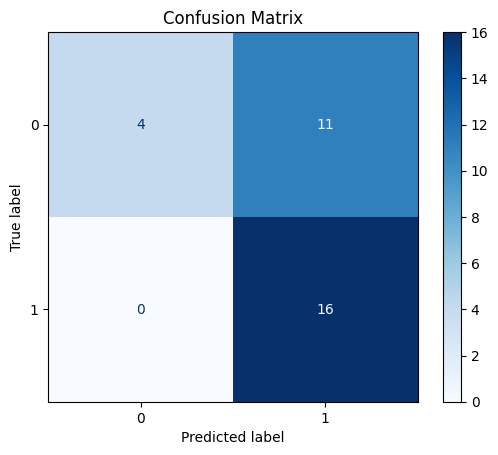

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_classifier.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [50]:
final_data = pd.DataFrame({'Models':['LR','RF','NB','DT','SVM','KNN','GB','MLP','XGB'],'ACC':[
    accuracy_score(anss,y_test),
    accuracy_score(y_test,rf_pred),
    accuracy_score(y_test,nb_pred),
    accuracy_score(y_test,dc_pred),
   accuracy_score(y_test, Y_predict),
   accuracy_score(y_test, Y_pred),
   accuracy_score(y_test, Y_pred2),
  accuracy_score(y_pred_t,y_test),
  accuracy_score(acc2,y_test)


                                                                                    ]})

In [51]:
final_data

,Models,ACC
0,LR,0.935484
1,RF,0.935484
2,NB,0.967742
3,DT,0.903226
4,SVM,0.935484
5,KNN,0.903226
6,GB,0.645161
7,MLP,0.870968
8,XGB,0.903226


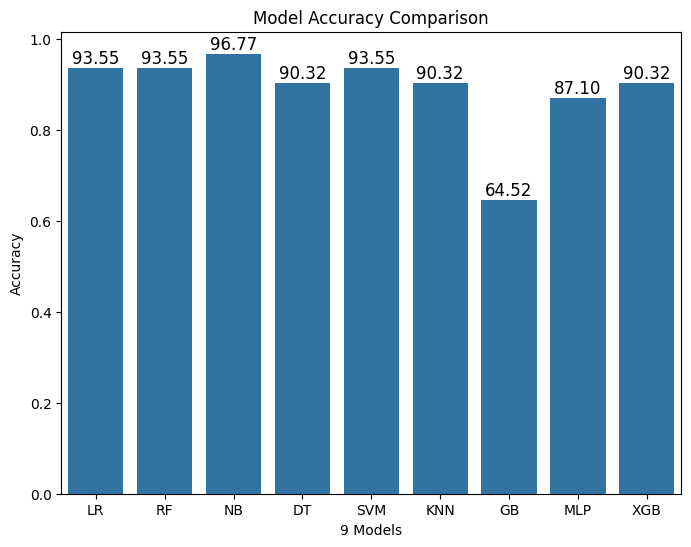

In [52]:
# Plotting the bar chart using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.barplot(x='Models', y='ACC', data=final_data)
plt.title('Model Accuracy Comparison')
plt.xlabel('9 Models')
plt.ylabel('Accuracy')
for index, row in final_data.iterrows():
    plt.text(index, row['ACC'] + 0.01, f'{row["ACC"]*100:.2f}', ha='center', fontsize=12)
plt.show()